In [1]:
from rossmann_toolbox import RossmannToolbox
import matplotlib.pyplot as plt

Using backend: pytorch


In [2]:
rtb = RossmannToolbox(use_gpu=True, hhsearch_loc='/opt/apps/hh-suite/bin/hhsearch')

In [3]:
data = {'1b8u_A': 'MAKTPMRVAVTGAAGQICYSLLFRIANGDMLGKDQPVILQLLEIPNEKAQKALQGVMMEIDDCAFPLLAGMTAHADPMTAFKDADVALLVGARPRGPGMERKDLLEANAQIFTVQGKAIDAVASRNIKVLVVGNPANTNAYIAMKSAPSLPAKNFTAMLRLDHNRALSQIAAKTGKPVSSIEKLFVWGNHSPTMYADYRYAQIDGASVKDMINDDAWNRDTFLPTVGKRGAAIIDARGVSSAASAANAAIDHIHDWVLGTAGKWTTMGIPSDGSYGIPEGVIFGFPVTTENGEYKIVQGLSIDAFSQERINVTLNELLEEQNGVQHLLG'}

### Detect cores in full-length sequence

In [4]:
# DL-based detection
cores1 = rtb.seq_detect_cores(data, mode='dl')
# HHsearch-based detection
cores2 = rtb.seq_detect_cores(data, mode='hhsearch')

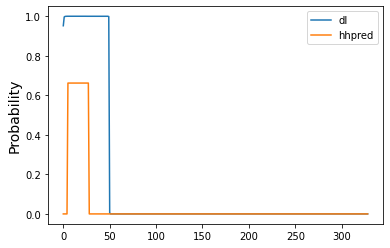

In [5]:
# Plotting
plt.plot(cores1['1b8u_A'][1], label='dl')
plt.plot(cores2['1b8u_A'][1], label='hhpred')
plt.ylabel('Probability', fontsize=14)
plt.legend()

In [6]:
# Hit description
cores1['1b8u_A'][0], cores2['1b8u_A'][0]

({0: (0, 49, 0.9999999)}, {0: (5, 27, 0.662)})

### Run prediction on cores

In [7]:
data = {'1b8u_A': 'MAKTPMRVAVTGAAGQICYSLLFRIANGDMLGKDQPVILQLLEIPNEKA'} # DL-based hit
rtb.predict(data, mode='core', importance=False)

{'1b8u_A': {'FAD': 0.00074189017,
  'FAD_std': 0.0008465903,
  'NAD': 0.9872206,
  'NAD_std': 0.020668598,
  'NADP': 0.017817048,
  'NADP_std': 0.02407751,
  'SAM': 0.0004566825,
  'SAM_std': 0.00084328325}}

In [8]:
data = {'1b8u_A': 'MRVAVTGAAGQICYSLLFRIAN'} # hhsearch-based hit
rtb.predict(data, mode='core', importance=False)

{'1b8u_A': {'FAD': 0.18007697,
  'FAD_std': 0.16300642,
  'NAD': 0.50282633,
  'NAD_std': 0.25215167,
  'NADP': 0.3871831,
  'NADP_std': 0.28262144,
  'SAM': 0.03431775,
  'SAM_std': 0.04995533}}

### Run prediction on full-length sequences (wrap core detection and evaluation)

In [9]:
data = {'1b8u_A': 'MAKTPMRVAVTGAAGQICYSLLFRIANGDMLGKDQPVILQLLEIPNEKAQKALQGVMMEIDDCAFPLLAGMTAHADPMTAFKDADVALLVGARPRGPGMERKDLLEANAQIFTVQGKAIDAVASRNIKVLVVGNPANTNAYIAMKSAPSLPAKNFTAMLRLDHNRALSQIAAKTGKPVSSIEKLFVWGNHSPTMYADYRYAQIDGASVKDMINDDAWNRDTFLPTVGKRGAAIIDARGVSSAASAANAAIDHIHDWVLGTAGKWTTMGIPSDGSYGIPEGVIFGFPVTTENGEYKIVQGLSIDAFSQERINVTLNELLEEQNGVQHLLG'}

In [10]:
rtb.predict(data, mode='seq', core_detect_mode='dl')

{'1b8u_A': {'FAD': 0.0007418316,
  'FAD_std': 0.0008465512,
  'NAD': 0.98721945,
  'NAD_std': 0.020669712,
  'NADP': 0.01781941,
  'NADP_std': 0.024079323,
  'SAM': 0.000456687,
  'SAM_std': 0.00084328663,
  'sequence': 'MAKTPMRVAVTGAAGQICYSLLFRIANGDMLGKDQPVILQLLEIPNEKA'}}

In [11]:
rtb.predict(data, mode='seq', core_detect_mode='hhsearch')

{'1b8u_A': {'FAD': 0.18007685,
  'FAD_std': 0.16300616,
  'NAD': 0.50282645,
  'NAD_std': 0.25215176,
  'NADP': 0.38718295,
  'NADP_std': 0.2826214,
  'SAM': 0.03431774,
  'SAM_std': 0.04995533,
  'sequence': 'MRVAVTGAAGQICYSLLFRIAN'}}